In [1]:
import tensorflow as tf
from tensorflow import keras


In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 12s 1us/step


In [3]:
x_train=x_train/255.0
x_test=x_test/255.0


In [4]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [9]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [13]:
history=model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0778 - accuracy: 0.9766 - val_loss: 0.0836 - val_accuracy: 0.9739
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0583 - accuracy: 0.9824 - val_loss: 0.0783 - val_accuracy: 0.9757
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0466 - accuracy: 0.9855 - val_loss: 0.0764 - val_accuracy: 0.9766
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0357 - accuracy: 0.9889 - val_loss: 0.0739 - val_accuracy: 0.9781
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0288 - accuracy: 0.9909 - val_loss: 0.0729 - val_accuracy: 0.9791


In [14]:
import numpy as np
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)

313/313 [==============================] - 0s 656us/step


In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix:")
print(cm)
acc=accuracy_score(y_test,y_pred)
print('Accuracy:',acc)

confusion matrix:
[[ 966    1    2    0    1    1    6    1    2    0]
 [   0 1127    4    0    0    1    1    0    2    0]
 [   2    2 1018    2    0    0    2    1    5    0]
 [   1    1    7  990    0    4    0    2    3    2]
 [   0    1    7    1  958    0    7    1    1    6]
 [   2    0    0    8    2  869    5    0    5    1]
 [   1    2    2    1    2    3  943    0    4    0]
 [   0    8   15    1    2    0    0  998    1    3]
 [   3    1    6    4    3    3    1    4  947    2]
 [   2    6    2    8    8    3    1    2    2  975]]
Accuracy: 0.9791


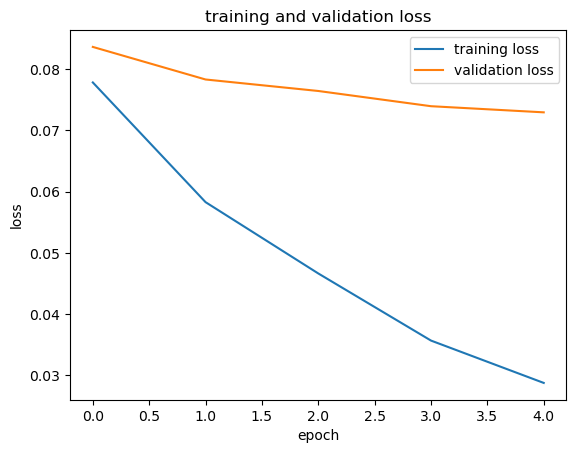

In [18]:
import matplotlib.pyplot as plt 
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.title('training and validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()